In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load the data
df = pd.read_csv('/Users/ravindrababuponnapula/Downloads/insurance_claims_generated.csv')

In [3]:
# Display the first few rows and basic information
print(df.head())
print(df.info())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 103   16         988435           1/1/00           OH   
1                 436   16         695005           1/1/00           IN   
2                 349   16         852458           1/1/00           IL   
3                 271   16         600073           1/1/00           IL   
4                 107   16         118484           1/1/00           OH   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               2000                1671.24         3000000   
1    250/500                500                1230.95         2000000   
2    100/300               1000                1298.76         1000000   
3   500/1000               1000                 658.14         2000000   
4    100/300                500                1673.47               0   

   insured_zip  ... total_claim_amount injury_claim property_claim  \
0       512956  ...              2

In [4]:
# Step 1: Handle missing values
# Replace '?' with NaN
df = df.replace('?', np.nan)

In [5]:
# Impute numeric columns with mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [6]:
# Impute categorical columns with most frequent value
categorical_columns = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

In [7]:
# Step 2: Convert categorical variables to numeric
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [8]:
# Step 3: Feature scaling
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [9]:
# Step 4: Convert date columns to datetime
date_columns = ['policy_bind_date', 'incident_date', 'claim_date']
for column in date_columns:
    df[column] = pd.to_datetime(df[column])

In [10]:
# Step 5: Create new features
df['claim_duration'] = (df['claim_date'] - df['incident_date']).dt.days
df['policy_age'] = (df['incident_date'] - df['policy_bind_date']).dt.days

In [11]:
print(df.head())

   months_as_customer  age  policy_number policy_bind_date  policy_state  \
0           -1.014663  0.0       1.686170       1970-01-01             2   
1            1.291492  0.0       0.557720       1970-01-01             1   
2            0.688983  0.0       1.163240       1970-01-01             0   
3            0.148803  0.0       0.192638       1970-01-01             0   
4           -0.986962  0.0      -1.659419       1970-01-01             2   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1           1.341429               0.974146        1.346779   
1           1          -1.068901              -0.040574        0.451830   
2           0          -0.265458               0.115705       -0.443119   
3           2          -0.265458              -1.360708        0.451830   
4           0          -1.068901               0.979285       -1.338068   

   insured_zip  ...  property_claim  vehicle_claim  auto_make  auto_model  \
0    -0.427645 

In [12]:
# Count the number of fraudulent claims
fraudulent_claims = df['fraudulent'].value_counts()
print("\nNumber of fraudulent claims:")
print(fraudulent_claims)


Number of fraudulent claims:
fraudulent
0    30076
1    29924
Name: count, dtype: int64


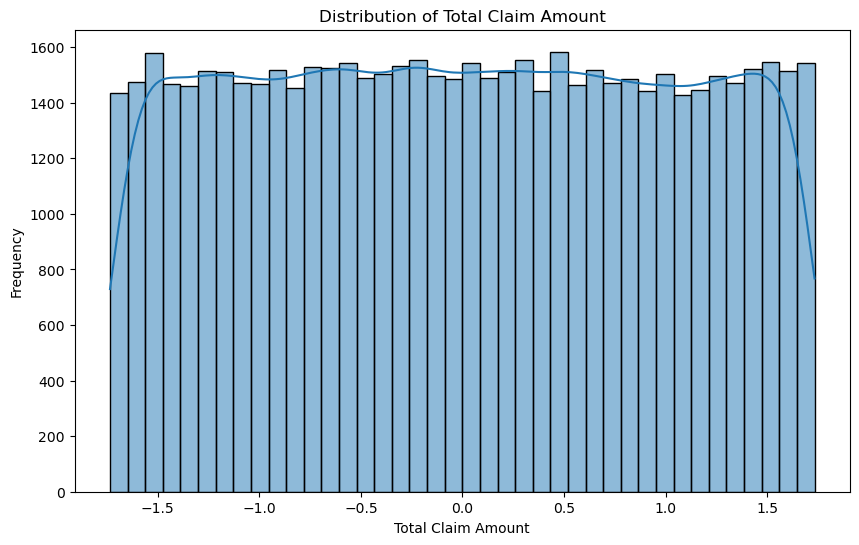

In [13]:
# 1. Distribution of total claim amount
plt.figure(figsize=(10, 6))
sns.histplot(df['total_claim_amount'], kde=True)
plt.title('Distribution of Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.show()

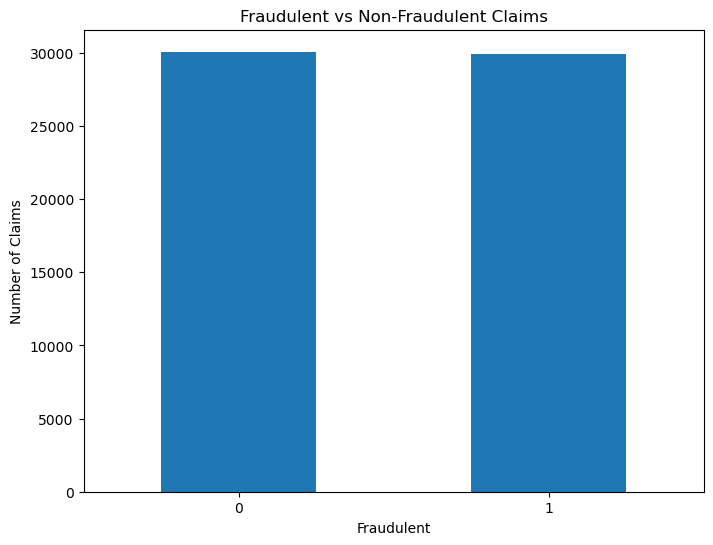

In [14]:
# Create a bar plot of fraudulent vs non-fraudulent claims
plt.figure(figsize=(8, 6))
fraudulent_claims.plot(kind='bar')
plt.title('Fraudulent vs Non-Fraudulent Claims')
plt.xlabel('Fraudulent')
plt.ylabel('Number of Claims')
plt.xticks(rotation=0)
plt.show()

In [15]:
# Calculate average total claim amount by incident type
avg_claim_by_incident = df.groupby('incident_type')['total_claim_amount'].mean().sort_values(ascending=False)
print("\nAverage total claim amount by incident type:")
print(avg_claim_by_incident)


Average total claim amount by incident type:
incident_type
2    0.011108
0    0.002372
1   -0.002617
3   -0.010945
Name: total_claim_amount, dtype: float64


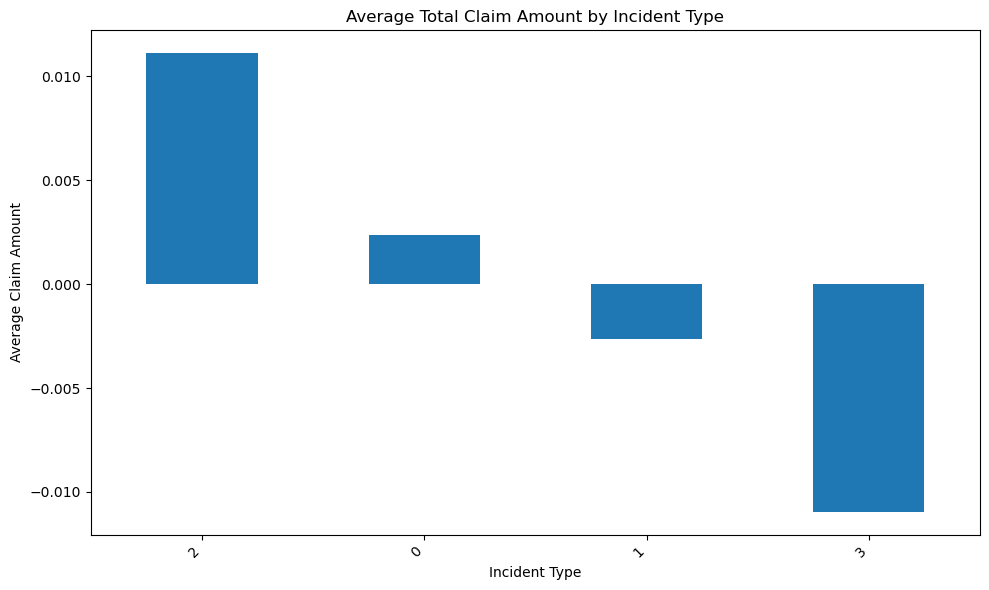

In [16]:
# Create a bar plot of average claim amount by incident type
plt.figure(figsize=(10, 6))
avg_claim_by_incident.plot(kind='bar')
plt.title('Average Total Claim Amount by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
# Find the most common car makes in the dataset
car_makes = df['auto_make'].value_counts()
print("\nMost common car makes:")
print(car_makes.head())


Most common car makes:
auto_make
3    12128
2    12068
4    12012
1    11961
0    11831
Name: count, dtype: int64


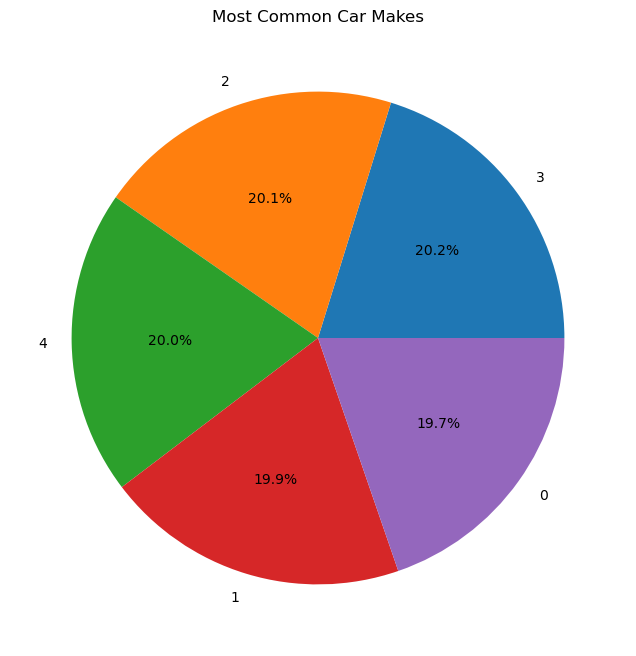

In [18]:
# Create a pie chart of the most common car makes
plt.figure(figsize=(10, 8))
car_makes.head().plot(kind='pie', autopct='%1.1f%%')
plt.title('Most Common Car Makes')
plt.ylabel('')
plt.show()

In [19]:
# Step 6: Drop unnecessary columns
columns_to_drop = ['policy_number', 'policy_bind_date', 'incident_date', 'claim_date']
df = df.drop(columns=columns_to_drop)

In [20]:
# Save the preprocessed data
df.to_csv('preprocessed_insurance_claims.csv', index=False)

In [21]:
print("Preprocessing completed and saved to 'preprocessed_insurance_claims.csv'")

Preprocessing completed and saved to 'preprocessed_insurance_claims.csv'


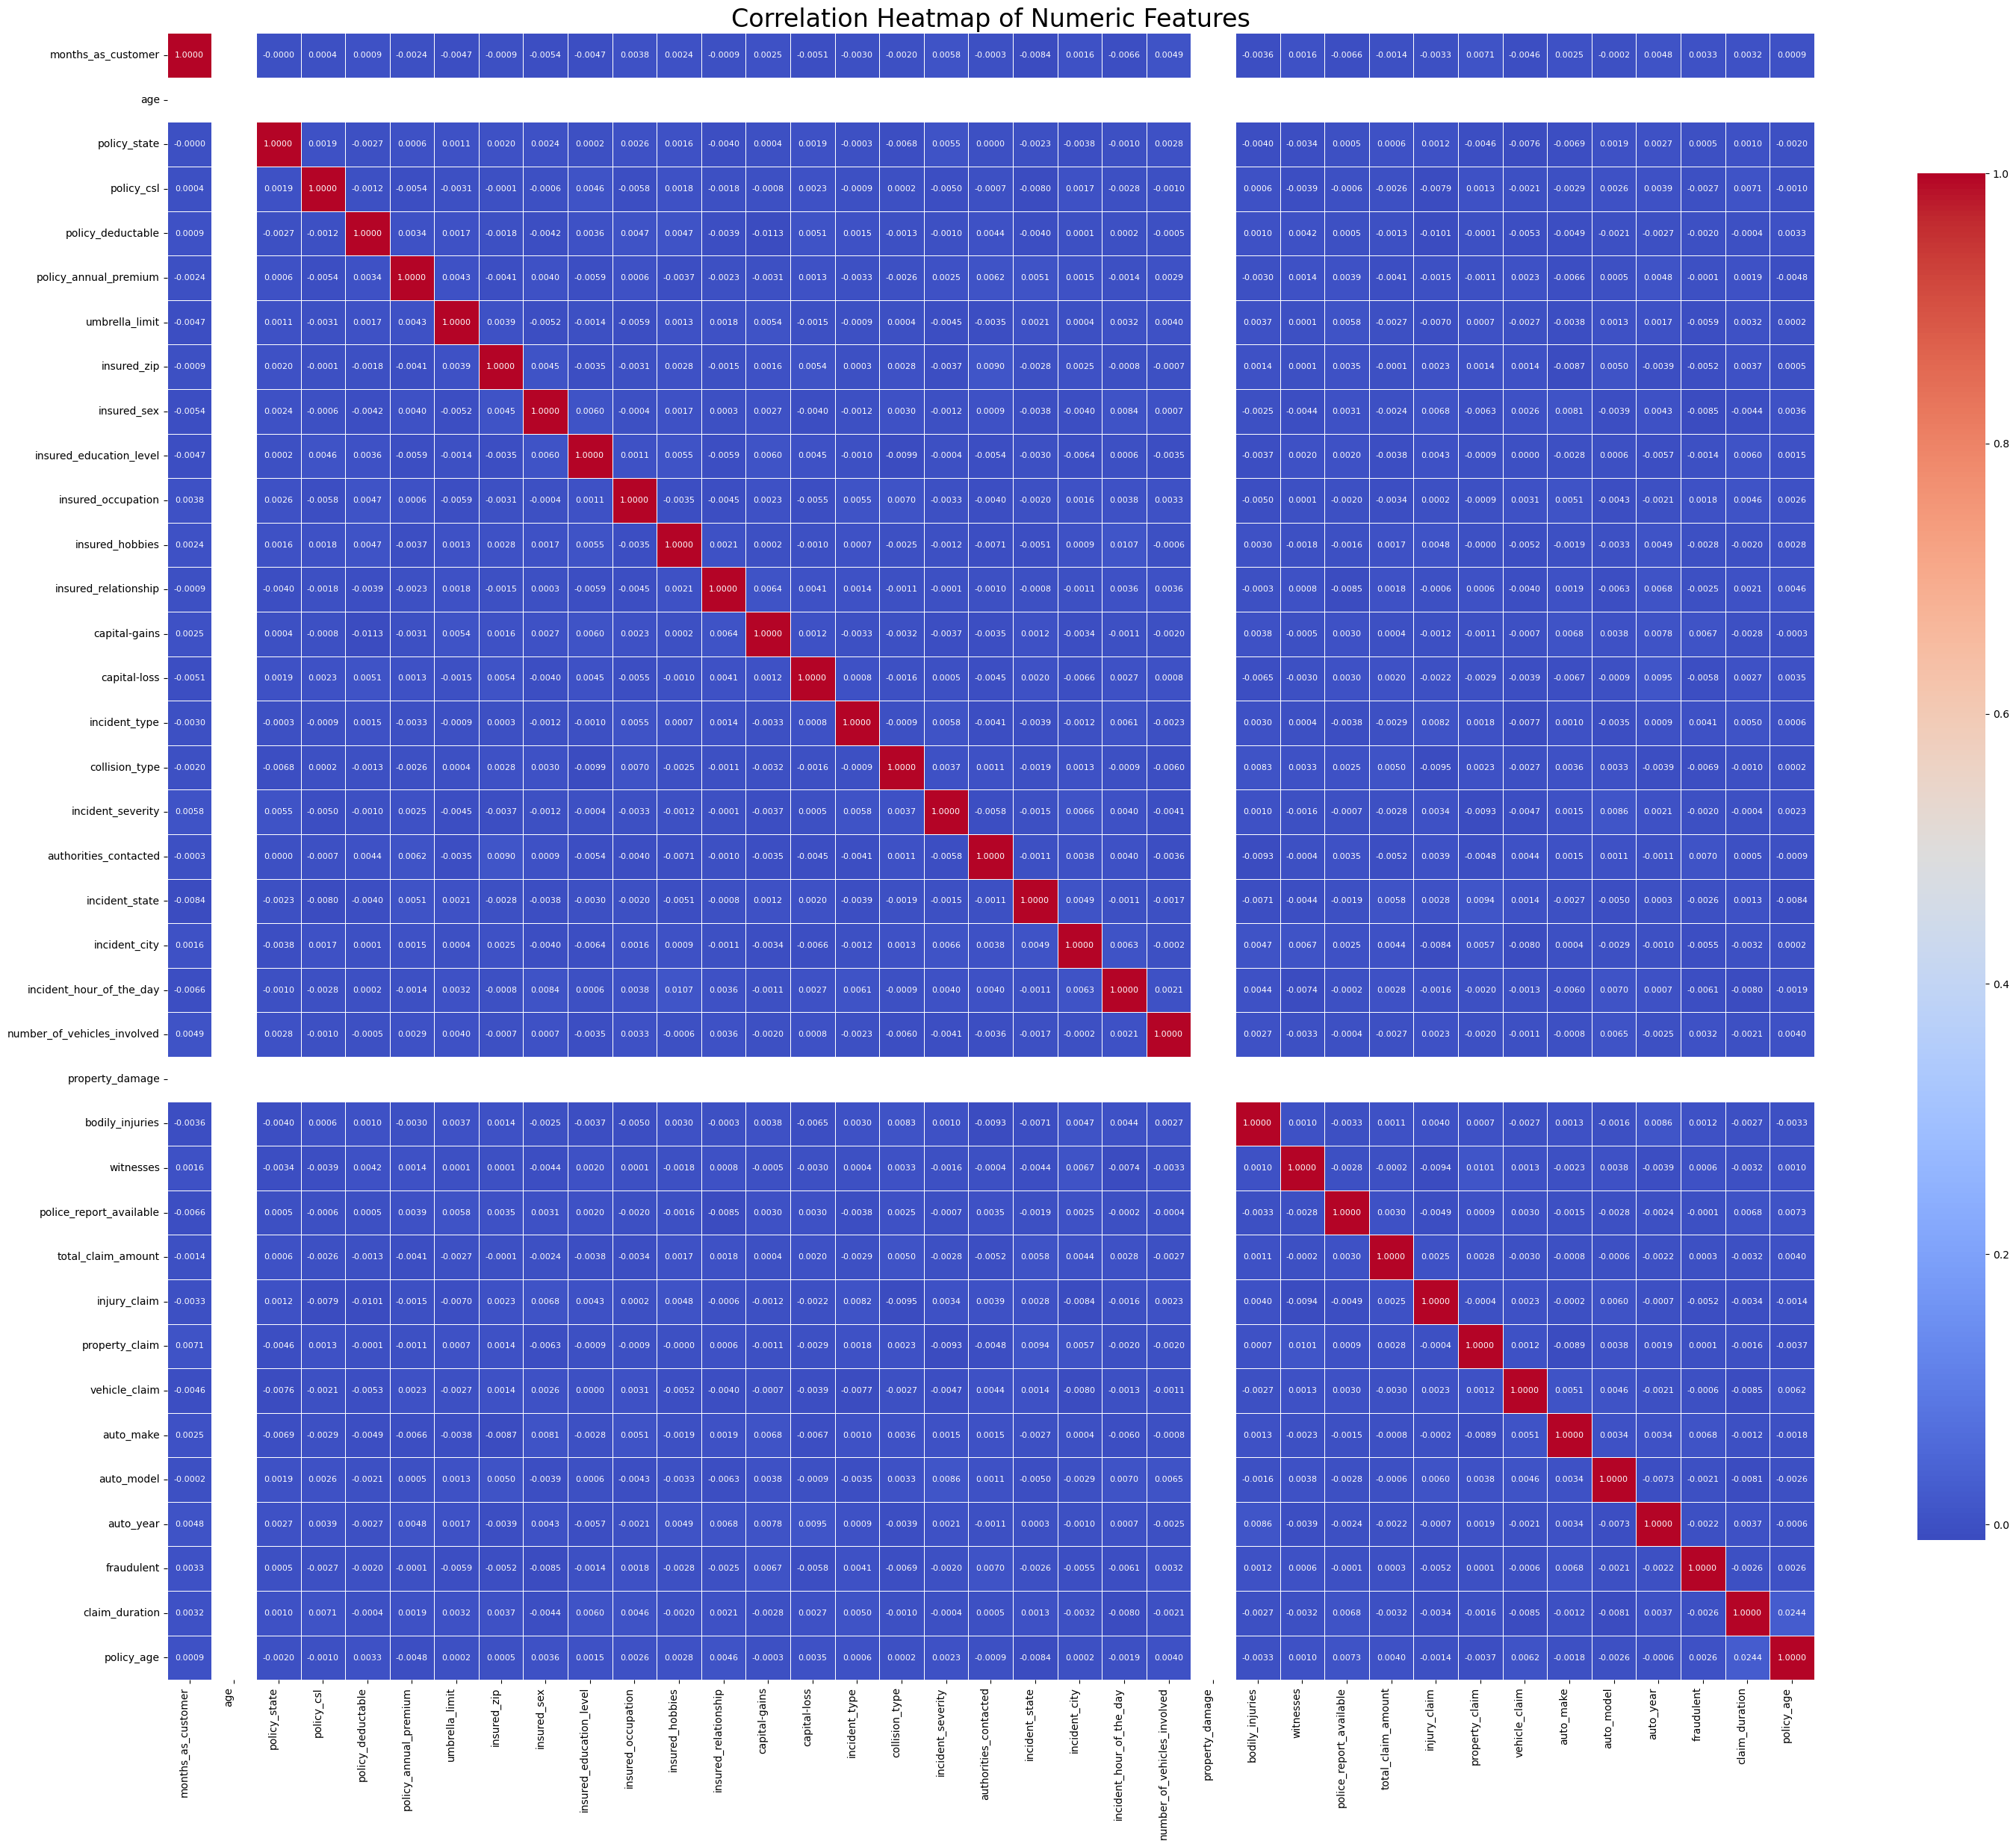

In [67]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
corr_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 25))

# Create the full heatmap with adjusted parameters
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
            linewidths=0.5, fmt='.4f', square=True, cbar_kws={"shrink": .8},
            annot_kws={"size": 8})

# Adjust layout and display
plt.title('Correlation Heatmap of Numeric Features', fontsize=24)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [23]:
# Model Training

# Prepare the data for modeling
features = ['age', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 'vehicle_claim']
X = df[features]
y = df['fraudulent']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [27]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy*100:.2f}")


Model Accuracy: 49.62


In [28]:
# Display feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                        feature  importance
11                vehicle_claim    0.131275
9                  injury_claim    0.131153
10               property_claim    0.131030
1         policy_annual_premium    0.130907
4                  capital-loss    0.130561
3                 capital-gains    0.130171
5      incident_hour_of_the_day    0.081218
8                     witnesses    0.036594
2                umbrella_limit    0.035962
6   number_of_vehicles_involved    0.034264
7               bodily_injuries    0.026863
0                           age    0.000000


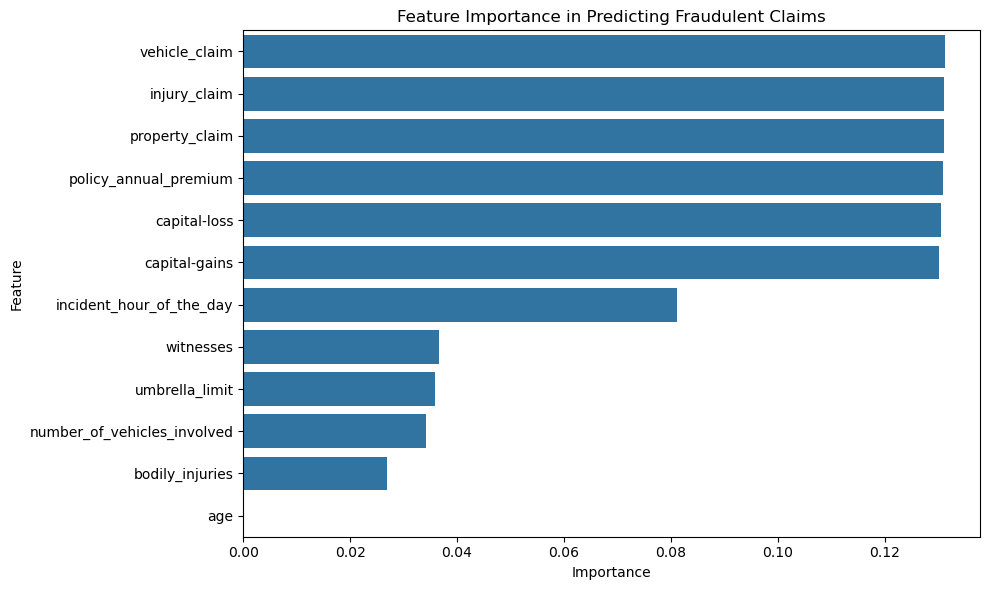

In [29]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Fraudulent Claims')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

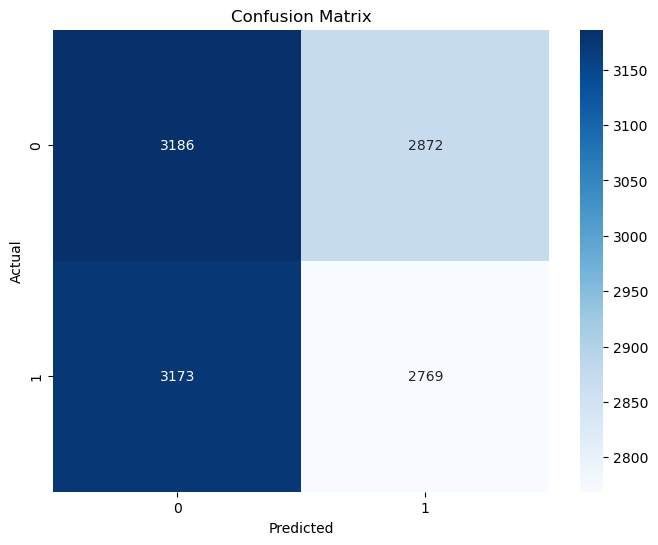

In [30]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()